**1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**


To perform a matrix multiplication between a (n, k) matrix (let's call it matrix A) and a (k, m) matrix (let's call it matrix B), the resulting matrix (let's call it matrix C) will have dimensions (n, m).


*   For each element in the resulting matrix C, you perform k multiplications.
*   For each element in the resulting matrix C, you perform k-1 additions.

The total number of multiplications in the entire matrix multiplication operation is n * m * k, and the total number of additions is n * m * (k-1).


**2.Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [11]:
import time
import numpy as np

def matrix_multiply_lists(a, b):
    n = len(a)
    k = len(a[0])
    m = len(b[0])

    result = [[0 for _ in range(m)] for _ in range(n)]

    for i in range(n):
        for j in range(m):
            for x in range(k):
                result[i][j] += a[i][x] * b[x][j]

    return result

def matrix_multiply_numpy(a, b):
    return np.dot(a, b)

def generate_random_matrix(rows, cols):
    return np.random.rand(rows, cols).tolist()

# Number of random matrices
num_matrices = 1000

# Dimensions of the matrices
rows_a, cols_a = 50, 40
cols_b = 40

# Initialize variables to store total time for each method
total_time_lists = 0
total_time_numpy = 0

for _ in range(num_matrices):
    # Generate random matrices
    matrix_a = generate_random_matrix(rows_a, cols_a)
    matrix_b = generate_random_matrix(cols_a, cols_b)

    # Measure time for matrix multiplication with lists of lists
    start_time_lists = time.time()
    result_lists = matrix_multiply_lists(matrix_a, matrix_b)
    end_time_lists = time.time()
    total_time_lists += end_time_lists - start_time_lists

    # Measure time for matrix multiplication with NumPy
    np_matrix_a = np.array(matrix_a)
    np_matrix_b = np.array(matrix_b)
    start_time_numpy = time.time()
    result_numpy = matrix_multiply_numpy(np_matrix_a, np_matrix_b)
    end_time_numpy = time.time()
    total_time_numpy += end_time_numpy - start_time_numpy

# Calculate average time for each method
average_time_lists = total_time_lists / num_matrices
average_time_numpy = total_time_numpy / num_matrices

print("Average time using lists of lists:", average_time_lists)
print("Average time using NumPy:", average_time_numpy)


Average time using lists of lists: 0.019058372735977172
Average time using NumPy: 9.11867618560791e-05


NumPy is generally faster than using lists of lists for matrix operations. NumPy is optimized for numerical operations and takes advantage of highly efficient C and Fortran libraries under the hood.

Note that for smaller array sizes and for less number of matrix multiplications, there is no significant difference in speed of both methods. But the difference in speed becomes more noticeable for larger and more number of matrices.

**3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

In [62]:
import time
import random
import numpy as np

def find_min(lst: list):
    minimum = 1000
    for i in range(len(lst)):
        if minimum > lst[i]:
            minimum = lst[i]
            index = i
    return index, minimum

def finding_the_median_norm(lst: list):
    start_time = time.time()
    length = len(lst)
    data = lst.copy()
    count = 0
    ans_value = -1
    ans_time = -1

    if length % 2 != 0:
        while count <= length // 2:
            i, temp = find_min(data)
            data[i] = 1000
            count += 1
        ans_value = temp

    elif length % 2 == 0:
        temp_1, temp_2 = 0, 0
        while count <= length // 2:
            i, temp = find_min(data)
            data[i] = 1000
            if count == length // 2:
                temp_1 = temp
            elif count == (length // 2) - 1:
                temp_2 = temp
            count += 1
        ans_value = (temp_1 + temp_2) / 2

    end_time = time.time()
    ans_time = end_time - start_time

    return ans_value, ans_time

def finding_the_median_opt(lst: list):
    start_time = time.time()
    length = len(lst)
    sorted_list = sorted(lst)
    ans_value = 0
    if length % 2 != 0:
        ans_value = sorted_list[length // 2]

    if length % 2 == 0:
        ans_value = (sorted_list[length // 2] + sorted_list[(length // 2) - 1]) / 2

    end_time = time.time()
    ans_time = end_time - start_time
    return ans_value, ans_time

def finding_the_median_np(np_array: np.ndarray):
    start_time = time.time()
    ans_value = np.median(np_array)
    end_time = time.time()
    ans_time = end_time - start_time
    return ans_value, ans_time

sum_opt_time = 0
sum_np_time = 0
sum_norm_time = 0

for _ in range(100):
    lst_norm = [random.randint(1, 1000) for _ in range(5000)]
    lst_opt = lst_norm[:]
    np_array = np.array(lst_norm)

    norm_ans_value, norm_ans_time = finding_the_median_norm(lst_norm)
    sum_norm_time += norm_ans_time

    opt_ans_value, opt_ans_time = finding_the_median_opt(lst_opt)
    sum_opt_time += opt_ans_time

    np_ans_value, np_ans_time = finding_the_median_np(np_array)
    sum_np_time += np_ans_time

avg_norm_time = sum_norm_time / 100
avg_opt_time = sum_opt_time / 100
avg_np_time = sum_np_time / 100

print("Time taken for using NumPy: {}".format(avg_np_time))
print("Time taken for using lists with optimization: {}".format(avg_opt_time))
print("Time taken for using lists without optimization: {}".format(avg_norm_time))


Time taken for using NumPy: 0.0003202986717224121
Time taken for using lists with optimization: 0.0009460330009460449
Time taken for using lists without optimization: 1.0687461495399475


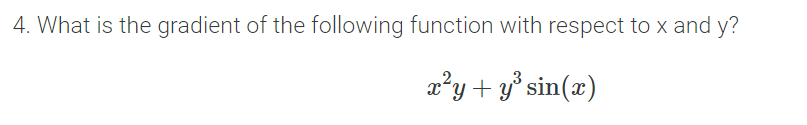

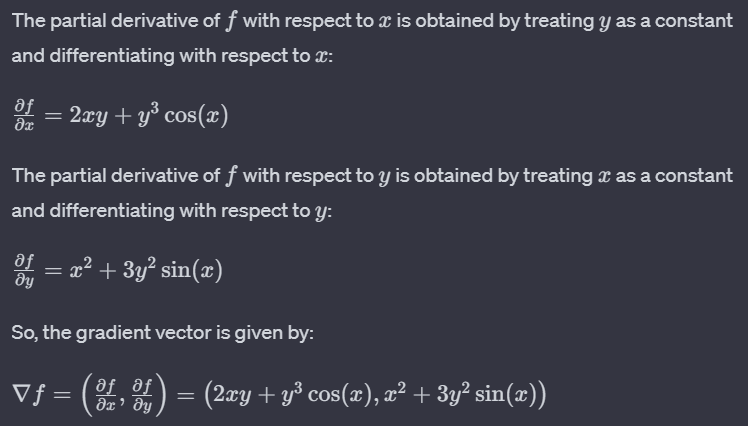

**5.Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [63]:
import jax
import jax.numpy as jnp
import math

def function_to_optimize(x, y):
    return (x * 2) * y + (y * 3) * jnp.sin(x)

def partial_derivative_with_respect_to_x(x, y):
    return 2 * x * y + y * 3 * jnp.cos(x)

def partial_derivative_with_respect_to_y(x, y):
    return x * 2 + 3 * y**2 * jnp.sin(x)

gradient_function = jax.grad(function_to_optimize, argnums=(0, 1))

x_value = 0.5
y_value = 1.0

gradient_x, gradient_y = gradient_function(x_value, y_value)

print("Gradient of the function at x =", x_value, "and y =", y_value, "is:", (gradient_x, gradient_y))

partial_derivative_x = partial_derivative_with_respect_to_x(x_value, y_value)
partial_derivative_y = partial_derivative_with_respect_to_y(x_value, y_value)

print("Partial derivatives at x =", x_value, "and y =", y_value, "are:", (partial_derivative_x, partial_derivative_y))


Gradient of the function at x = 0.5 and y = 1.0 is: (Array(4.6327477, dtype=float32, weak_type=True), Array(2.4382768, dtype=float32, weak_type=True))
Partial derivatives at x = 0.5 and y = 1.0 are: (Array(3.6327477, dtype=float32, weak_type=True), Array(2.4382768, dtype=float32, weak_type=True))


**6. Use sympy to confirm that you obtain the same gradient analytically.**

In [47]:
from sympy import symbols, diff, cos, sin

# Define variables
x, y = symbols('x y')

# Define the function
f = x**2*y + y**3*sin(x)

# Compute partial derivatives
df_dx = diff(f, x)
df_dy = diff(f, y)

# Display the results
df_dx, df_dy


(2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))

**7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.**

In [34]:
students_data = {
    2022: {
        'Branch 1': {
            'Roll Number': 1,
            'Name': 'N',
            'Marks': {'Maths': 100, 'English': 70}  # Add more subjects as needed
        },
        'Branch 2': {
            # You can add more students or information for Branch 2 similarly
        }
    },
    2023: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2024: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2025: {
        'Branch 1': {},
        'Branch 2': {}
    }
}

# Example: Accessing data
print(students_data)


{2022: {'Branch 1': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}, 'Branch 2': {}}, 2023: {'Branch 1': {}, 'Branch 2': {}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}


**8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [38]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks  # Dictionary with subjects as keys and marks as values


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []  # List to store Student objects


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []  # List to store Branch objects


class Database:
    def __init__(self):
        self.years = []  # List to store Year objects

    def add_year(self, year):
        self.years.append(year)


# Example Usage:
database = Database()

# Adding data for the year 2022
year_2022 = Year(2022)

branch_1_2022 = Branch('Branch 1')
branch_1_2022.students.append(Student(1, 'N', {'Maths': 100, 'English': 70}))
# Add more students or branches for 2022 as needed

year_2022.branches.extend([branch_1_2022, Branch('Branch 2')])

database.add_year(year_2022)

# You can continue adding data for other years, branches, and students

# Accessing data example:
print(database.years[0].branches[0].students[0].marks['Maths'])  # Output: 100


100


**9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

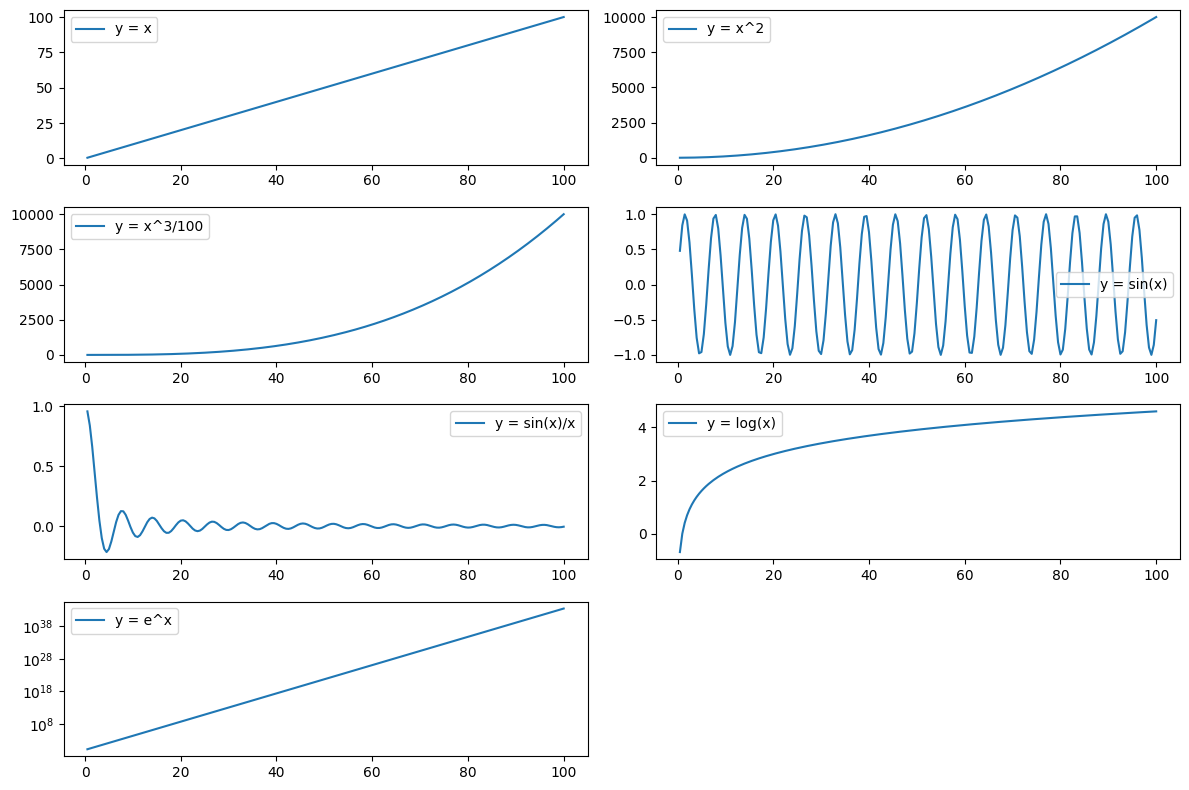

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Define the functions
def func1(x):
    return x

def func2(x):
    return x**2

def func3(x):
    return x**3 / 100

def func4(x):
    return np.sin(x)

def func5(x):
    return np.sin(x) / x

def func6(x):
    return np.log(x)

def func7(x):
    return np.exp(x)

# Generate x values in the specified domain
x_values = np.arange(0.5, 100.5, 0.5)

# Calculate y values for each function
y_values1 = func1(x_values)
y_values2 = func2(x_values)
y_values3 = func3(x_values)
y_values4 = func4(x_values)
y_values5 = func5(x_values)
y_values6 = func6(x_values)
y_values7 = func7(x_values)

# Plot each function separately
plt.figure(figsize=(12, 8))

plt.subplot(4, 2, 1)
plt.plot(x_values, y_values1, label='y = x')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(x_values, y_values2, label='y = x^2')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(x_values, y_values3, label='y = x^3/100')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(x_values, y_values4, label='y = sin(x)')
plt.legend()

plt.subplot(4, 2, 5)
plt.plot(x_values, y_values5, label='y = sin(x)/x')
plt.legend()

plt.subplot(4, 2, 6)
plt.plot(x_values, y_values6, label='y = log(x)')
plt.legend()

plt.subplot(4, 2, 7)
plt.plot(x_values, y_values7, label='y = e^x')
plt.yscale("log")  # Adjust y-axis scale for e^x
plt.legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


**10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [43]:
import numpy as np
import pandas as pd

# Generate a matrix of size 20x5 with random numbers between 1 and 2
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a Pandas DataFrame with column names "a", "b", "c", "d", "e"
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Display the DataFrame
print("DataFrame:")
print(df)

# Find the column with the highest standard deviation
max_std_column = df.std().idxmax()
print("\nColumn with the highest standard deviation:", max_std_column)

# Find the row with the lowest mean
min_mean_row = df.mean(axis=1).idxmin()
print("Row with the lowest mean:", min_mean_row)


DataFrame:
           a         b         c         d         e
0   1.627091  1.359255  1.401852  1.518966  1.390781
1   1.624655  1.367603  1.164348  1.848432  1.339879
2   1.989243  1.384076  1.522267  1.013966  1.543005
3   1.909925  1.620049  1.944492  1.373288  1.534646
4   1.258475  1.917979  1.093601  1.683536  1.135326
5   1.433557  1.160689  1.070303  1.910415  1.432161
6   1.875166  1.984705  1.852932  1.335381  1.587356
7   1.412822  1.280256  1.664497  1.082106  1.791722
8   1.566881  1.689250  1.598192  1.866798  1.174345
9   1.790404  1.548552  1.444956  1.409177  1.159807
10  1.179748  1.971105  1.323307  1.339839  1.868530
11  1.140983  1.984319  1.999079  1.216185  1.592784
12  1.600152  1.790124  1.052956  1.078939  1.767717
13  1.547414  1.676324  1.399130  1.196203  1.829286
14  1.627984  1.916830  1.220678  1.860993  1.782454
15  1.589725  1.690120  1.352448  1.581541  1.462847
16  1.505135  1.874126  1.581346  1.832200  1.760837
17  1.838266  1.715000  1.789870  1

**11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [44]:
import numpy as np
import pandas as pd

# Generate a matrix of size 20x5 with random numbers between 1 and 2
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a Pandas DataFrame with column names "a", "b", "c", "d", "e"
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Add a new column "f" which is the sum of columns "a", "b", "c", "d", "e"
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Create a new column "g" based on the condition
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Display the updated DataFrame
print("Updated DataFrame:")
print(df)

# Find the number of rows where the value in column "g" is "LT8"
lt8_count = df[df['g'] == 'LT8'].shape[0]
print("\nNumber of rows where value in column 'g' is 'LT8':", lt8_count)

# Find the standard deviation of column "f" for rows where the value in column "g" is "LT8" and "GT8" respectively
std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("\nStandard deviation of column 'f' for rows where value in column 'g' is 'LT8':", std_lt8)
print("Standard deviation of column 'f' for rows where value in column 'g' is 'GT8':", std_gt8)


Updated DataFrame:
           a         b         c         d         e         f    g
0   1.409689  1.455034  1.562204  1.161228  1.514302  7.102458  LT8
1   1.861036  1.742235  1.922739  1.529304  1.105543  8.160857  GT8
2   1.259353  1.335844  1.420616  1.036122  1.012857  6.064792  LT8
3   1.382669  1.940591  1.492121  1.116325  1.217008  7.148714  LT8
4   1.842178  1.723498  1.557422  1.339118  1.225113  7.687330  LT8
5   1.104956  1.999832  1.369664  1.699889  1.391527  7.565867  LT8
6   1.155633  1.656778  1.427438  1.139933  1.411480  6.791262  LT8
7   1.207932  1.063554  1.018418  1.954028  1.483247  6.727178  LT8
8   1.368520  1.966242  1.509957  1.605784  1.259724  7.710227  LT8
9   1.471601  1.634639  1.105409  1.299184  1.103102  6.613936  LT8
10  1.645595  1.420359  1.596080  1.608723  1.425803  7.696560  LT8
11  1.618087  1.242185  1.612995  1.541268  1.750979  7.765514  LT8
12  1.572825  1.448806  1.105564  1.220499  1.181785  6.529480  LT8
13  1.682864  1.891854  1.171

**12. Write a small piece of code to explain broadcasting in numpy.**

[Broadcasting in NumPy](https://youtu.be/tKcLaGdvabM)

In [45]:
import numpy as np

# Creating a 3x3 array
arr1 = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])

# Creating a 1x3 array
arr2 = np.array([10, 20, 30])

# Broadcasting: Adding a 1x3 array to a 3x3 array
result = arr1 + arr2

# Displaying the original arrays and the result
print("Original Array 1:")
print(arr1)
print("\nOriginal Array 2:")
print(arr2)
print("\nResult after Broadcasting:")
print(result)


Original Array 1:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Original Array 2:
[10 20 30]

Result after Broadcasting:
[[11 22 33]
 [14 25 36]
 [17 28 39]]


**13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [46]:
import numpy as np

def custom_argmin(arr):
    """
    Compute the index of the minimum element in a NumPy array.

    Parameters:
    - arr (numpy.ndarray): Input array.

    Returns:
    - int: Index of the minimum element.
    """
    min_index = 0  # Initialize index to the first element
    min_value = arr[min_index]  # Initialize minimum value

    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i

    return min_index

# Example usage:
input_array = np.array([5, 2, 8, 1, 4, 7])
custom_argmin_result = custom_argmin(input_array)

# Verify with np.argmin
numpy_argmin_result = np.argmin(input_array)

print("Custom argmin result:", custom_argmin_result)
print("NumPy argmin result:", numpy_argmin_result)


Custom argmin result: 3
NumPy argmin result: 3
